In [11]:
import tensorflow as tf
print(tf.__version__)

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#Seaborn is a data visualization library built on top of Matplotlib. 
#It provides a high-level interface for creating informative and attractive statistical graphics. 
import tensorflow as tf
#TensorFlow is an open-source machine learning framework developed by Google.
#you can access its functions and classes to create and train neural networks, perform numerical computations, and work with various machine learning tasks.

print(tf.__version__)

import tensorflow_addons as tfa

#----------DATA READING 
filename = 'https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv'
# read file
csv_data = pd.read_csv(filename, sep=',')
print(len(csv_data.keys()))

#----------DATA CLEANUP 
# drop bad data
#This drops any rows with missing values from the DataFrame and stores the result in clean_data.
clean_data = csv_data.dropna() 

dropped_data = csv_data[~csv_data.index.isin(clean_data.index)]
print("Dropped rows with missing values:")
print(dropped_data)


# normalize the data in range to bring the values between 0 and 1. 
norm_data = (clean_data-clean_data.min())/(clean_data.max()-clean_data.min()) 

print(norm_data.describe())
#This prints a summary of the normalized data, including count, mean, standard deviation, minimum, 25th percentile, 
# median, 75th percentile, and maximum values.
print(clean_data.describe())

2.12.0
2.12.0
9
Dropped rows with missing values:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value]
Index: []
          longitude      latitude  housing_median_age   total_rooms   
count  17000.000000  17000.000000        17000.000000  17000.000000  \
mean       0.476882      0.327867            0.540968      0.069637   
std        0.199718      0.227135            0.246803      0.057465   
min        0.000000      0.000000            0.000000      0.000000   
25%        0.254980      0.147715            0.333333      0.038487   
50%        0.583665      0.181722            0.549020      0.056017   
75%        0.632470      0.550478            0.705882      0.083017   
max        1.000000      1.000000            1.000000      1.000000   

       total_bedrooms    population    households  median_income   
count    17000.000000  17000.000000  17000.000000   17000.000000  \
mean     

In [12]:
#----------TRAIN/TEST SPLIT 
train_data = norm_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = norm_data.drop(train_data.index) # reserve the rest for testing
#This drops the indices of the train_data from the norm_data DataFrame to create the remaining 20% of the data, which is assigned to the test_data DataFrame for testing.

# separate out the y (results) from x (features)
#These lines separate the target variable (median_house_value) from the features (x_train) in the training data. 
#The features are stored in the x_train DataFrame, while the target values are stored in the y_train Series.
#In this case, axis=1 indicates that the column 'median_house_value' should be dropped along the horizontal axis (columns axis). 
x_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

# separate out the y (results) from x (features)
x_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']

print('Training Data\n', x_train.describe().transpose())
print('Test Data\n', x_test.describe().transpose())

Training Data
                       count      mean       std       min       25%       50%   
longitude           13600.0  0.477153  0.199740  0.000000  0.254980  0.584163  \
latitude            13600.0  0.327513  0.226840  0.000000  0.147715  0.181722   
housing_median_age  13600.0  0.540104  0.247196  0.000000  0.333333  0.549020   
total_rooms         13600.0  0.070023  0.058317  0.000000  0.038461  0.056109   
total_bedrooms      13600.0  0.083991  0.066309  0.000155  0.045934  0.067194   
population          13600.0  0.040128  0.032796  0.000000  0.022086  0.032624   
households          13600.0  0.082623  0.064109  0.000164  0.046045  0.067176   
median_income       13600.0  0.233638  0.132050  0.000000  0.142598  0.209925   

                         75%       max  
longitude           0.632470  0.984064  
latitude            0.549416  1.000000  
housing_median_age  0.705882  1.000000  
total_rooms         0.083281  1.000000  
total_bedrooms      0.101024  1.000000  
populatio

In [6]:
print(len(x_train.keys()))

8


In [14]:
#--------MODEL BUILDING
num_params = len(x_train.keys())


#tf.keras.Sequential is a class in TensorFlow's Keras API that allows you to create a sequential model in a linear stack of layers. 
#It is a convenient way to define a feed-forward neural network, where the data flows sequentially from the input layer through the hidden layers to the output layer.
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),    
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])

learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              loss='mse', # loss function to minimize              
              metrics=['mae',]) # list of metrics to monitor

#This code compiles the model using the compile() method. The optimizer is set to RMSprop with a learning rate of 0.001. 
#The loss function is mean squared error (mse) as it is a regression task, and the metrics to monitor during training are mean absolute error (mae).
#Optimizer: The optimizer is responsible for updating the parameters of the model during the training process to minimize the loss function. 
#It determines how the model's weights are adjusted based on the gradients computed during backpropagation. 
# The loss function measures the discrepancy between the predicted output of the model and the true output (labels) during training.
# It quantifies how well the model is performing. 
# Metrics are used to evaluate the performance of the model during training and testing. 
#They provide additional information about the model's performance, apart from the loss function.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_01 (Dense)            (None, 32)                288       
                                                                 
 dense_02 (Dense)            (None, 32)                1056      
                                                                 
 Output_Layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Fit/Train model on training data
#The fit() method trains the model using the specified parameters and returns a history object that contains information about the training process, 
#such as loss and metric values per epoch. 

history = model.fit(x_train, y_train, batch_size=16, epochs=100, validation_split=0.2, verbose=1)

#batch_size specifies the number of samples per gradient update. It controls how many samples are processed before the model's internal parameters are updated. 
#In this case, a batch size of 16 is used, meaning that the model will update its parameters after processing every 16 samples.

#epochs determines the number of times the entire training dataset is passed through the model. Each epoch consists of multiple batches. 
#In this example, the model will be trained for 100 epochs, iterating over the entire dataset 100 times.

#validation_split specifies the fraction of the training data to be used as validation data. In this case, 20% of the training data will be used for validation during training. 
#This helps monitor the model's performance on unseen data and detect overfitting.

#verbose controls the verbosity mode during training. Setting it to 1 displays progress bar and training logs, while 0 disables the logs.

Epoch 1/100
680/680 [==============================] - 2s 3ms/step - loss: 0.0333 - mae: 0.1325 - val_loss: 0.0209 - val_mae: 0.1051
Epoch 2/100
680/680 [==============================] - 1s 2ms/step - loss: 0.0223 - mae: 0.1089 - val_loss: 0.0185 - val_mae: 0.1013
Epoch 3/100
680/680 [==============================] - 1s 2ms/step - loss: 0.0206 - mae: 0.1046 - val_loss: 0.0218 - val_mae: 0.1022
Epoch 4/100
680/680 [==============================] - 1s 2ms/step - loss: 0.0196 - mae: 0.1016 - val_loss: 0.0170 - val_mae: 0.0975
Epoch 5/100
680/680 [==============================] - 1s 2ms/step - loss: 0.0190 - mae: 0.0996 - val_loss: 0.0173 - val_mae: 0.0998
Epoch 6/100
680/680 [==============================] - 2s 2ms/step - loss: 0.0186 - mae: 0.0981 - val_loss: 0.0164 - val_mae: 0.0907
Epoch 7/100
680/680 [==============================] - 1s 2ms/step - loss: 0.0182 - mae: 0.0969 - val_loss: 0.0157 - val_mae: 0.0906
Epoch 8/100
680/680 [==============================] - 1s 2ms/step - 

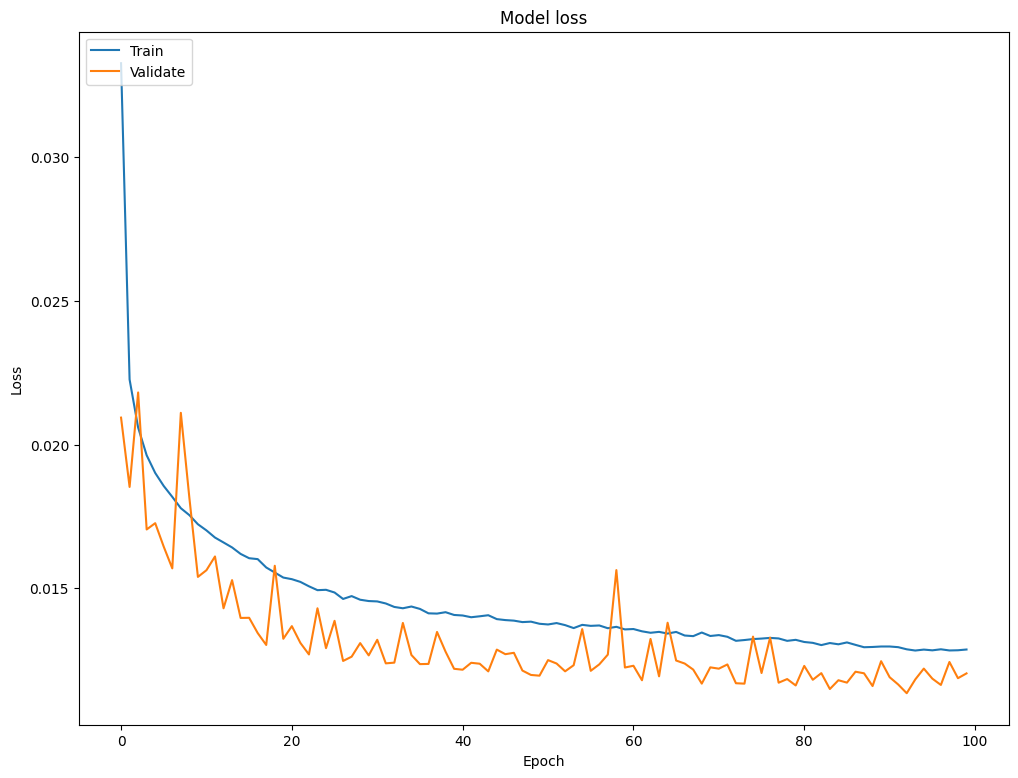

In [17]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
#fig = plt.figure(figsize=(12, 9)) creates a new figure with a specified size of 12 inches (width) and 9 inches (height). This sets the dimensions of the plot.

plt.plot(history.history['loss'])
#plt.plot(history.history['loss']) plots the training loss values. history.history['loss'] retrieves the loss values recorded during training.

plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

#In summary, the training error represents the model's performance on the training data, the validation error helps in monitoring the model's performance during training and 
#guiding the hyperparameter tuning process, and the test error provides an unbiased evaluation of the model's generalization performance on unseen data.


In [18]:
#--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)
#model.evaluate() is used to evaluate the model on the test data.
#verbose=2 sets the verbosity mode to 2, which displays a progress bar during evaluation.
#The evaluate() method returns the loss value and any additional metrics specified during model compilation. 
#In this case, the loss value is assigned to loss and the mean absolute error (MAE) is assigned to mae.

107/107 - 1s - loss: 0.0134 - mae: 0.0836 - 702ms/epoch - 7ms/step
Loss: 0.013372838497161865 MAE: 0.08359923958778381


In [20]:
#--------PREDICT
p_test = model.predict(x_test)
#By using predict(), you can obtain the model's predictions on the test data. The variable p_test will contain the predicted values corresponding to the input features in x_test. 
# These predicted values can be used for further analysis, evaluation, or comparison with the true output values (y_test) to assess the model's performance.

107/107 [==============================] - 0s 756us/step


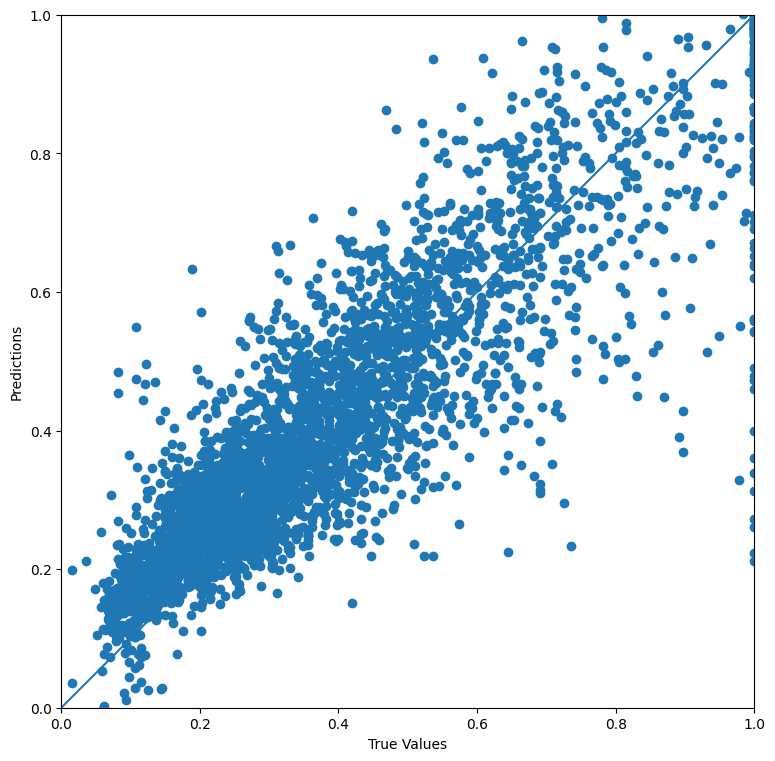

In [21]:
#----------PLOT True Values vs. Predictions
#a = plt.axes(aspect='equal') creates an axes object with equal aspect ratio. This ensures that the plot is displayed with equal scaling on both axes.
#plt.scatter(y_test, p_test) creates a scatter plot where the x-axis represents the true values (y_test) and the y-axis represents the predicted values (p_test). 
#Each point in the plot represents a data point from the test set, showing the correspondence between the true values and the predictions.

fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
#lims = [0, 1] defines the limits for the x-axis and y-axis as [0, 1]. This ensures that both axes have the same range.
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

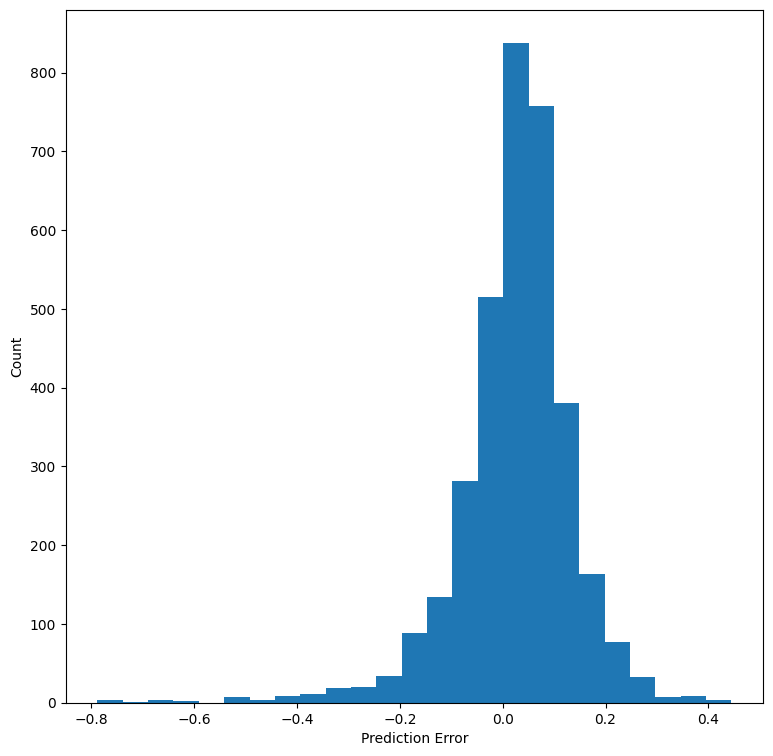

In [22]:
fig = plt.figure(figsize=(9, 9))
error = p_test.flatten() - y_test
plt.hist(error, bins=25)
#error = p_test.flatten() - y_test calculates the prediction errors by subtracting the true values (y_test) from the predicted values (p_test). The .flatten() method is used to convert the predicted and true values to 1D arrays, ensuring they have the same shape.
plt.#hist(error, bins=25) creates a histogram of the prediction errors using the hist() function. The error array is passed as the input, and bins=25 specifies the number of bins to divide the data into.
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()
